# Use Fourier Transform to remove high frequency noise  

## Import the libaries we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

## Design the "Orinal pattern"

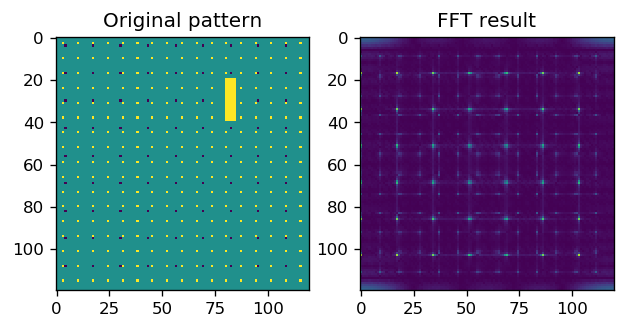

In [2]:
square = np.zeros((120,120))
for i in range (120):
    for j in range(120):
        if i%7 == 3 and j%7==3:
            square[i][j]=1
        if i %13 == 4 and j%13==4:
            square[i][j]=-1
for i in range(20,40,1):
    for j in range(80,85,1):
        square[i][j]=1
plt.figure(dpi=120)
plt.subplot(1,2,1)
plt.title("Original pattern")
plt.imshow(square);
plt.subplot(1,2,2)
square_fft = np.fft.fft2(square)
plt.title("FFT result")
plt.imshow(abs(square_fft));

## Define the interact function

In [3]:
def filter(lwb=43,upb=73):
    ### Produce squre pattern
    square = np.zeros((120,120))
    for i in range (120):
        for j in range(120):
            if i%7 == 3 and j%7==3:
                square[i][j]=1
            if i %13 == 4 and j%13==4:
                square[i][j]=-1
    for i in range(20,40,1):
        for j in range(80,85,1):
            square[i][j]=1
    ####
    
    mask = np.zeros((120,120))
    square_fft = np.fft.fft2(square)
    
    for i in range(lwb,upb):
        for j in range(120):
            square_fft[i][j] = 0
            mask[i][j]=1
    for j in range(lwb,upb):
        for i in range(120):
            square_fft[i][j]=0
            mask[i][j]=1
            
    ### After doing the fft again, the pattern would reverse
    ### So, we need to reverse it back!
    result = abs(np.fft.fft2(square_fft))
    final_result = np.zeros((120,120))
    for i in range(120):
        for j in range(120):
            final_result [119-i][119-j] = result[i][j]
    
    
    ### Plot figure
    plt.figure(dpi=120)
    plt.subplot(1,3,1)
    plt.title("Mask shape")
    plt.imshow(mask)
    plt.subplot(1,3,2)
    plt.title("FFT after applying mask")
    plt.imshow(abs(square_fft))
    plt.subplot(1,3,3)
    plt.title("Final result")
    plt.imshow(final_result)
    plt.tight_layout()

In [4]:
interact(filter, lwb=(1,120),upb=(1,120));

interactive(children=(IntSlider(value=43, description='lwb', max=120, min=1), IntSlider(value=73, description=…